# 위해지표
## 학교500M내 유흥업소 개수, 학교폭력피해장소, 학교폭력피해유형, 학교폭력피해시간

In [1]:
import pandas as pd
import warnings 
# import geopandas as gpd
import numpy as np
# from shapely.geometry import Polygon, LineString, Point
warnings.filterwarnings(action='ignore')

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

# matplotlib 한글 처리
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [2]:
# 데이터 불어오기 
high_school = pd.read_csv("C:\sooeun\DATAexam\ConvergenceProject-School_Violence\Data\서울특별시_스케일링_고등학교지표_230131.csv",index_col = 0)
high_school.columns

Index(['시도교육청코드', '시도교육청명', '표준학교코드', '학교명', '영문학교명', '학교종류명', '소재지명', '시군구',
       '관할조직명', '설립명', '도로명우편번호', '도로명주소', '도로명상세주소', '전화번호', '홈페이지주소',
       '남녀공학구분명', '팩스번호', '고등학교구분명', '산업체특별학급존재여부', '고등학교일반실업구분명',
       '특수목적고등학교계열명', '입시전후기구분명', '주야구분명', '설립일자', '개교기념일', '수정일', '위도', '경도',
       '교실안', '특별실,방과후 교실 등', '복도,계단', '화장실', '운동장,체육관,강당 등', '급식실,매점 등',
       '기숙사', '학원이나학원 근처', '집이나집 근처', 'PC방,노래방,오락실 등', '공원, 놀이터,골목, 공터,뒷산 등',
       '학교 밖체험활동 장소', '사이버공간', '피해장소_기타', '강요', '금품갈취', '신체폭력', '사이버폭력',
       '집단따돌림', '피해유형_기타', '등교시간', '수업시간', '쉬는시간', '점심시간', '학교 안방과후 시간',
       '하교시간', '학교 밖체험활동 시간', '학교 일과가끝난 후', '피해시간_기타', '평균 교육 시간(1학급당)',
       '나의보호자나친척', '학교선생님', '학교상담실선생님', '학교폭력신고함이나학교 익명게시판', '친구나선·후배',
       '학교전담경찰관,경찰', '117학교폭력신고센터', '학교 밖상담 기관', '아무에게도알리지않음', '피해 응답 학생 수',
       '한부모가족지원법수급자_재가보호_가구원수', '국민기초생활보장법수급자_가구원수', '저소득', '중간', '고소득',
       '생활인구수', '다문화가족', '국제결혼가정', '외국인가정', '단란주점수', '성인게임장수', '술집수', '유흥주점수',
       '총 신고 수', '청소년비행신고수', '학교

In [3]:
harm = high_school[['학교명','교실안', '특별실,방과후 교실 등', '복도,계단', '화장실', '운동장,체육관,강당 등', '급식실,매점 등',
       '기숙사', '학원이나학원 근처', '집이나집 근처', 'PC방,노래방,오락실 등', '공원, 놀이터,골목, 공터,뒷산 등',
       '학교 밖체험활동 장소', '사이버공간', '피해장소_기타','강요', '금품갈취', '신체폭력', '사이버폭력',
       '집단따돌림', '피해유형_기타','등교시간', '수업시간', '쉬는시간', '점심시간', '학교 안방과후 시간',
       '하교시간', '학교 밖체험활동 시간', '학교 일과가끝난 후', '피해시간_기타','500m_inner_Harmful_dept']]
harm

,학교명,교실안,"특별실,방과후 교실 등","복도,계단",화장실,"운동장,체육관,강당 등","급식실,매점 등",기숙사,학원이나학원 근처,집이나집 근처,...,등교시간,수업시간,쉬는시간,점심시간,학교 안방과후 시간,하교시간,학교 밖체험활동 시간,학교 일과가끝난 후,피해시간_기타,500m_inner_Harmful_dept
0,가락고등학교,1.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
1,가재울고등학교,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
2,강동고등학교,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,0
3,강서고등학교,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
4,강서공업고등학교,0.666667,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.333333,0.0,0.333333,0.0,0.333333,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,효문고등학교,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
316,휘경공업고등학교,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
317,휘경여자고등학교,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,1
318,휘문고등학교,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0


In [4]:
total=harm.loc[:,['교실안','신체폭력',
       '집단따돌림','쉬는시간','500m_inner_Harmful_dept']]
total

,교실안,신체폭력,집단따돌림,쉬는시간,500m_inner_Harmful_dept
0,1.000000,0.0,1.000000,0.0,0
1,0.000000,0.0,0.000000,0.0,0
2,0.000000,0.0,1.000000,1.0,0
3,0.000000,0.0,0.000000,0.0,0
4,0.666667,0.0,0.333333,1.0,1
...,...,...,...,...,...
315,0.000000,0.0,0.000000,1.0,0
316,1.000000,0.0,0.000000,0.0,0
317,0.000000,0.0,0.000000,0.0,1
318,1.000000,0.0,0.000000,0.0,0


In [5]:
labels= np.array(harm['학교명'])

# 표준화

In [6]:
sd = StandardScaler()
total_sd=pd.DataFrame(sd.fit_transform(total))
total_sd.index = labels
total_sd.head()

,0,1,2,3,4
가락고등학교,1.774499,-0.393657,2.106003,-0.721230,-0.492452
가재울고등학교,-0.732117,-0.393657,-0.589501,-0.721230,-0.492452
강동고등학교,-0.732117,-0.393657,2.106003,1.657974,-0.492452
강서고등학교,-0.732117,-0.393657,-0.589501,-0.721230,-0.492452
강서공업고등학교,0.938961,-0.393657,0.309000,1.657974,-0.206454


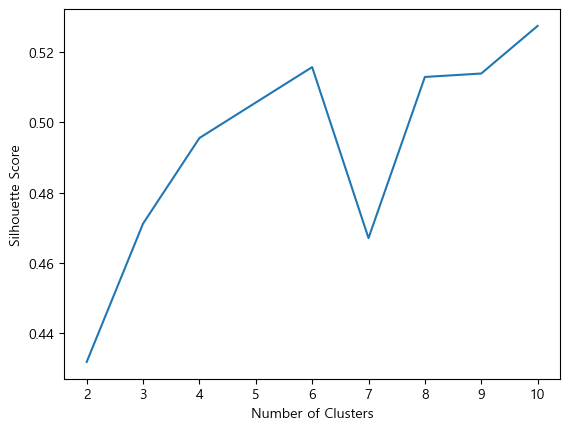

In [7]:
# KMeans clustering with different number of clusters
scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=77)
    kmeans.fit(total_sd.iloc[:,:5])
    score = silhouette_score(total_sd.iloc[:,:5], kmeans.labels_)
    scores.append(score)

# Plotting the silhouette scores
plt.plot(range(2, 11), scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Elbow Method(Standard Scaler)

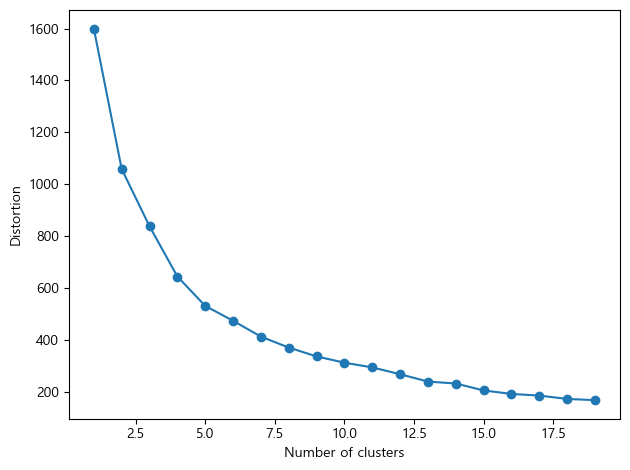

In [8]:
dist =[]
for i in range(1,20):
    k = KMeans(n_clusters=i,
          init='k-means++',
           n_init=10,
           max_iter=300,
           random_state=0)
    k.fit(total_sd)
    dist.append(k.inertia_)

plt.plot(range(1,20),dist, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [9]:
np.random.seed(1234)
total_sd_arr = total_sd.values

# k값을 5로 설정 후 k-means에 적용시키기
kmeans = KMeans(n_clusters=6, random_state=2021).fit(total_sd_arr)
kmeans.cluster_centers_

array([[ 0.38517315,  2.27319244,  0.25676181,  0.2654941 , -0.15989658],
       [-0.65579393, -0.39365712, -0.55494344, -0.70979143, -0.1514548 ],
       [-0.60678636, -0.32620152,  1.97122796,  0.15114477, -0.16355468],
       [-0.41879012, -0.39365712, -0.36487582, -0.42382945,  3.52938486],
       [ 0.94869697, -0.28639713, -0.24725382,  1.20035393, -0.29485342],
       [ 1.74664809, -0.25874591,  1.85142776,  1.23500422, -0.21598751]])

In [10]:
total_sd['cluster'] = kmeans.labels_
total_sd

,0,1,2,3,4,cluster
가락고등학교,1.774499,-0.393657,2.106003,-0.721230,-0.492452,5
가재울고등학교,-0.732117,-0.393657,-0.589501,-0.721230,-0.492452,1
강동고등학교,-0.732117,-0.393657,2.106003,1.657974,-0.492452,2
강서고등학교,-0.732117,-0.393657,-0.589501,-0.721230,-0.492452,1
강서공업고등학교,0.938961,-0.393657,0.309000,1.657974,-0.206454,4
...,...,...,...,...,...,...
효문고등학교,-0.732117,-0.393657,-0.589501,1.657974,-0.492452,4
휘경공업고등학교,1.774499,-0.393657,-0.589501,-0.721230,-0.492452,4
휘경여자고등학교,-0.732117,-0.393657,-0.589501,-0.721230,-0.206454,1
휘문고등학교,1.774499,-0.393657,-0.589501,-0.721230,-0.492452,4


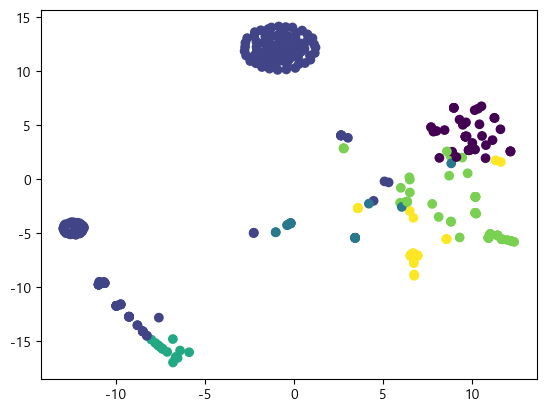

In [11]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100,random_state=888)
transformed = model.fit_transform(total_sd.iloc[:,:5])

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=kmeans.labels_)

plt.show()

In [12]:
total_sd.groupby('cluster').mean()

,0,1,2,3,4
cluster,,,,,
0,0.385173,2.273192,0.256762,0.265494,-0.159897
1,-0.655794,-0.393657,-0.554943,-0.709791,-0.151455
2,-0.606786,-0.326202,1.971228,0.151145,-0.163555
3,-0.418790,-0.393657,-0.364876,-0.423829,3.529385
4,0.948697,-0.286397,-0.247254,1.200354,-0.294853
5,1.746648,-0.258746,1.851428,1.235004,-0.215988


In [13]:
harm_score = total_sd.groupby('cluster').mean()
harm_score

,0,1,2,3,4
cluster,,,,,
0,0.385173,2.273192,0.256762,0.265494,-0.159897
1,-0.655794,-0.393657,-0.554943,-0.709791,-0.151455
2,-0.606786,-0.326202,1.971228,0.151145,-0.163555
3,-0.418790,-0.393657,-0.364876,-0.423829,3.529385
4,0.948697,-0.286397,-0.247254,1.200354,-0.294853
5,1.746648,-0.258746,1.851428,1.235004,-0.215988


In [14]:
harm_score.reset_index(inplace=True)
harm_score.rename(columns={'index': '학교명', 0: '교실안', 1: '신체폭력', 2: '집단따돌림',3:'쉬는시간',4:'500m_inner_Harmful_dept'}, inplace=True)
harm_score

,cluster,교실안,신체폭력,집단따돌림,쉬는시간,500m_inner_Harmful_dept
0,0,0.385173,2.273192,0.256762,0.265494,-0.159897
1,1,-0.655794,-0.393657,-0.554943,-0.709791,-0.151455
2,2,-0.606786,-0.326202,1.971228,0.151145,-0.163555
3,3,-0.418790,-0.393657,-0.364876,-0.423829,3.529385
4,4,0.948697,-0.286397,-0.247254,1.200354,-0.294853
5,5,1.746648,-0.258746,1.851428,1.235004,-0.215988


# 결과해석
cluster0 : 6 제일 안전 0
cluster1 : 1 제일 위험 100
cluster2 : 3 주의 60
cluster3 : 2 위험 80
cluster4 : 4 보통 40
cluster5 : 5 안전 20

In [15]:
total_sd

,0,1,2,3,4,cluster
가락고등학교,1.774499,-0.393657,2.106003,-0.721230,-0.492452,5
가재울고등학교,-0.732117,-0.393657,-0.589501,-0.721230,-0.492452,1
강동고등학교,-0.732117,-0.393657,2.106003,1.657974,-0.492452,2
강서고등학교,-0.732117,-0.393657,-0.589501,-0.721230,-0.492452,1
강서공업고등학교,0.938961,-0.393657,0.309000,1.657974,-0.206454,4
...,...,...,...,...,...,...
효문고등학교,-0.732117,-0.393657,-0.589501,1.657974,-0.492452,4
휘경공업고등학교,1.774499,-0.393657,-0.589501,-0.721230,-0.492452,4
휘경여자고등학교,-0.732117,-0.393657,-0.589501,-0.721230,-0.206454,1
휘문고등학교,1.774499,-0.393657,-0.589501,-0.721230,-0.492452,4


In [16]:
total_sd.reset_index(inplace=True)

In [17]:
total_sd = total_sd[['index','cluster']]
total_sd

,index,cluster
0,가락고등학교,5
1,가재울고등학교,1
2,강동고등학교,2
3,강서고등학교,1
4,강서공업고등학교,4
...,...,...
315,효문고등학교,4
316,휘경공업고등학교,4
317,휘경여자고등학교,1
318,휘문고등학교,4


In [18]:
total_sd["위해지표_score"] = [
    0 if x == 0 else
    100 if x == 1 else 
    60 if x == 2 else 
    80 if x == 3 else 
    40 if x == 4 else 
    20 for x in total_sd.cluster]
total_sd

,index,cluster,위해지표_score
0,가락고등학교,5,20
1,가재울고등학교,1,100
2,강동고등학교,2,60
3,강서고등학교,1,100
4,강서공업고등학교,4,40
...,...,...,...
315,효문고등학교,4,40
316,휘경공업고등학교,4,40
317,휘경여자고등학교,1,100
318,휘문고등학교,4,40


In [19]:
total_sd["위해지표_학교폭력위험도"] = [
    "매우 안전" if x == 0 else
    "매우 위험" if x == 1 else 
    "주의" if x == 2 else 
    "위험" if x == 3 else 
    "보통" if x == 4 else 
    "안전" for x in total_sd.cluster]
total_sd

,index,cluster,위해지표_score,위해지표_학교폭력위험도
0,가락고등학교,5,20,안전
1,가재울고등학교,1,100,매우 위험
2,강동고등학교,2,60,주의
3,강서고등학교,1,100,매우 위험
4,강서공업고등학교,4,40,보통
...,...,...,...,...
315,효문고등학교,4,40,보통
316,휘경공업고등학교,4,40,보통
317,휘경여자고등학교,1,100,매우 위험
318,휘문고등학교,4,40,보통


In [20]:
total_sd.rename(columns = {'index':'학교명','cluster':'위해지표_cluster'},inplace=True)
total_sd

,학교명,위해지표_cluster,위해지표_score,위해지표_학교폭력위험도
0,가락고등학교,5,20,안전
1,가재울고등학교,1,100,매우 위험
2,강동고등학교,2,60,주의
3,강서고등학교,1,100,매우 위험
4,강서공업고등학교,4,40,보통
...,...,...,...,...
315,효문고등학교,4,40,보통
316,휘경공업고등학교,4,40,보통
317,휘경여자고등학교,1,100,매우 위험
318,휘문고등학교,4,40,보통


In [21]:
# 저장 후 주석처리 
# total_sd.to_csv("C:/sooeun/DATAexam/ConvergenceProject-School_Violence/Data/DB_서울특별시_고등학교_학교폭력_위해지표.csv")

# 위해지표(harm_features)

In [22]:
data = pd.merge(harm, total_sd, on=['학교명'], how='outer', sort=True)
data

,학교명,교실안,"특별실,방과후 교실 등","복도,계단",화장실,"운동장,체육관,강당 등","급식실,매점 등",기숙사,학원이나학원 근처,집이나집 근처,...,점심시간,학교 안방과후 시간,하교시간,학교 밖체험활동 시간,학교 일과가끝난 후,피해시간_기타,500m_inner_Harmful_dept,위해지표_cluster,위해지표_score,위해지표_학교폭력위험도
0,가락고등학교,1.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0,5,20,안전
1,가재울고등학교,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0,1,100,매우 위험
2,강동고등학교,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,1.0,0,2,60,주의
3,강서고등학교,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0,1,100,매우 위험
4,강서공업고등학교,0.666667,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.333333,0.0,0.333333,0.0,0.333333,0.0,1,4,40,보통
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,효문고등학교,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0,4,40,보통
316,휘경공업고등학교,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0,4,40,보통
317,휘경여자고등학교,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,1,1,100,매우 위험
318,휘문고등학교,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0,4,40,보통


In [23]:
data.columns

Index(['학교명', '교실안', '특별실,방과후 교실 등', '복도,계단', '화장실', '운동장,체육관,강당 등',
       '급식실,매점 등', '기숙사', '학원이나학원 근처', '집이나집 근처', 'PC방,노래방,오락실 등',
       '공원, 놀이터,골목, 공터,뒷산 등', '학교 밖체험활동 장소', '사이버공간', '피해장소_기타', '강요', '금품갈취',
       '신체폭력', '사이버폭력', '집단따돌림', '피해유형_기타', '등교시간', '수업시간', '쉬는시간', '점심시간',
       '학교 안방과후 시간', '하교시간', '학교 밖체험활동 시간', '학교 일과가끝난 후', '피해시간_기타',
       '500m_inner_Harmful_dept', '위해지표_cluster', '위해지표_score',
       '위해지표_학교폭력위험도'],
      dtype='object')

In [24]:
harm_features = data[['학교명','교실안','신체폭력','집단따돌림','쉬는시간','500m_inner_Harmful_dept','위해지표_score','위해지표_cluster','위해지표_학교폭력위험도']]
harm_features

,학교명,교실안,신체폭력,집단따돌림,쉬는시간,500m_inner_Harmful_dept,위해지표_score,위해지표_cluster,위해지표_학교폭력위험도
0,가락고등학교,1.000000,0.0,1.000000,0.0,0,20,5,안전
1,가재울고등학교,0.000000,0.0,0.000000,0.0,0,100,1,매우 위험
2,강동고등학교,0.000000,0.0,1.000000,1.0,0,60,2,주의
3,강서고등학교,0.000000,0.0,0.000000,0.0,0,100,1,매우 위험
4,강서공업고등학교,0.666667,0.0,0.333333,1.0,1,40,4,보통
...,...,...,...,...,...,...,...,...,...
315,효문고등학교,0.000000,0.0,0.000000,1.0,0,40,4,보통
316,휘경공업고등학교,1.000000,0.0,0.000000,0.0,0,40,4,보통
317,휘경여자고등학교,0.000000,0.0,0.000000,0.0,1,100,1,매우 위험
318,휘문고등학교,1.000000,0.0,0.000000,0.0,0,40,4,보통


In [25]:
# 저장 후 주석처리 
# harm_features.to_csv("C:/sooeun/DATAexam/ConvergenceProject-School_Violence/Data/DB_서울특별시_고등학교_학교폭력_위해지표_harm_features.csv")